# A/B Test for MuscleHub
***

# Introduction

This project is an A/B Test practice project from CodeAcademy. This is for a fictional gym, MuscleHub, who wants to gain insights on their visitors. Their current system for onboarding new members from the visitors follow three steps. The first step is to take a fitness test with a personal trainer. Second, prospective member would fill out an application. Third, prospective member submits a payment for the first month. Janet, a manager from MuscleHub, thinks that a fitness test intimidates some prospective members, so she set up an A/B test. For a period of time, Janet collected data by randomly assigning visitors to one of two groups: Group A are those still asked to take a fitness test with a personal trainer and Group B who skips the fitness test. Janet's hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership than visitors assigned to Group A. 

## Project Goals
* Analyze the data from an A/B test with Python
* Some of the questions that will be answered are the following:

    1. Were there approximately the same number of visitors assigned to each group?
    1. Were the number of applications submitted affected by which group the visitor was assigned to?
    1. Of the applications, how many paid for a membership?
    1. What would you recommend the MuscleHub do, keep the fitness test or get rid of it?


# Data

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful in this investigation. And provided the data to you as csv files for each table.

Import the four csv files as pandas DataFrames and examine them. Create the following four pandas DataFrames:
* *visits* from the **visits.csv** file, which contains information about potential gym customers who have visited MuscleHub.
* *fitness_tests* from the **fitness_tests.csv** file, which contains information about potential customers in “Group A”, who were given a fitness test.
* *applications* from the **applications.csv** file, which contains information about any potential customers (both “Group A” and “Group B”) who filled out an application. Not everyone in the **visits.csv** file will have filled out an application.
* *purchases* from the **purchases.csv** file, which contains information about customers who purchased a membership to MuscleHub.

### Load data

In [1]:
# Load necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for calculations
import seaborn as sns # for creating visualizations

%matplotlib inline

In [2]:
# Import and read the csv files
applications = pd.read_csv("../input/musclehub-abtest/applications.csv")
fitness_tests = pd.read_csv("../input/musclehub-abtest/fitness_tests.csv")
purchases = pd.read_csv("../input/musclehub-abtest/purchases.csv")
visits = pd.read_csv("../input/musclehub-abtest/visits.csv")

In [3]:
# To preview the dataframe to see what data we are working with
print("applications :")
applications.head()

applications :


,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [4]:
print("fitness_test :")
fitness_tests.head()

fitness_test :


,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [5]:
print("purchases :")
purchases.head()

purchases :


,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [6]:
print("visits :")
visits.head()

visits :


,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


# Process Data 

Since we have four separate DataFrames, we would need to combine it into a single DataFrame. Note that not all visits in visit.csv occurred during the A/B test so would need to filter out data of visits on dates before, but not including, 7-1-17.

In [7]:
# Create a new visits DataFrame based on date
visits = visits[visits['visit_date'] >= '7-1-17']

# Merge all four DataFrames
df = visits.merge(fitness_tests,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    applications,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    purchases,on=['first_name', 'last_name', 'email', 'gender'], how='left')

# Examine the new DataFrame
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


In [8]:
# Double check if there are any duplicates after merging
# Selecting duplicate rows except first occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date


We further clean up our DataFrame by adding a new column, called ab_test_group. The column is created by creating a variable containing fitness test dates to create a new variable with values of A if the fitness test date variable is not NaN, and B if the fitness test date variable is NaN.

In [9]:
# Create new ab_test_group variable and add to dataframe
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:'A' if pd.notnull(x) else 'B')

# Examine the new DataFrame
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A


# Analysis

The null and alternate hypotheses are as follows:
* Null Hypothesis = There will no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.
* Alternate Hypothesis = There will be more visitors in Group B that will purchase membership than visitors in Group A that will purchase membership.

The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be: 𝛼 = 0.05.

First, we need to determine if the A/B test was conducted properly with the visitors split appromixately in half in group A and half are in group B.

In [10]:
# Obtain value counts of each group
df['ab_test_group'].value_counts()

A    2504
B    2500
Name: ab_test_group, dtype: int64

In [11]:
# Obtain percentages of each group
df['ab_test_group'].value_counts(normalize=True)

A    0.5004
B    0.4996
Name: ab_test_group, dtype: float64

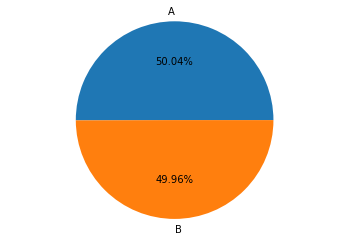

In [12]:
# Create a pie chart of test group
plt.pie(df['ab_test_group'].value_counts(), labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()

The visitors were split approximately in half so we can proceed in running a statistical analysis on the data.
Recall that the sign-up process was the following:
1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

We will determine the percentage of people in each group who complete Step 2.

In [13]:
# Create is_application variable
df['is_application'] = df.application_date.apply(lambda x: 'Application'
                                                  if pd.notnull(x) else 'No Application')

In [14]:
# Create new app_counts DataFrame
app_counts = df.groupby(['ab_test_group', 'is_application'])\
               .first_name.count().reset_index()

# Check DataFrame
app_counts.head()

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


In [15]:
# Pivot app_counts DataFrame for easier readability
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group',
                            values='first_name')\
            .reset_index()

# View app_pivot
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [16]:
# Create the total variable
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']

# Create the percent with application variable
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total

# View app_pivot
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


From the pivot table, we see that more people from Group B turned in an application in the rate of 13.0% compared to 9.9%. To determine if the difference for the categorical variables is statistically significant, we run a Chi-square test and find the p-value which we then compare to the significance threshold of 0.05.

In [17]:
# Import hypothesis test module
from scipy.stats import chi2_contingency

# Calculate the p-value
contingency = [[250, 2254], [325, 2175]]
chi2_contingency(contingency)

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

A p-value of 0.00096 relative to a significance threshold of 0.05 indicates that there is a statistically significant difference between the two groups and would lead us to reject the null hypothesis.


Now we explore visitors who submitted an application and ended up purchasing a membership for each group. By doing the same method as above.

In [18]:
# Create an is_member variable
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')

# Create the just_apps DataFrame
just_apps = df[df.is_application == 'Application']

# Create member_count DataFrame
member_count = just_apps.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()

# Pivot member_count
member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

# Create the Total variable
member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']

# Create the Percent Purchase variable
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


In [19]:
# Calculate the p-value
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

From the member_pivot DataFrame it looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. But a p-value of 0.432 relative to a significance threshold of 0.05 does not reflect a statistically significant difference between the two groups, and would lead us to fail to reject the null hypothesis.

Is there a statistically significant difference of the percentage of people who picked up applications purchased memberships?
In other words, determine what percentage of ALL visitors purchased memberships.

In [20]:
# Create final_member_count DataFrame
final_member_count = df.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
# Pivot final_member_count
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

# Create the Total variable
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']

# Create the Percent Purchase variable
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

# Calculate the p-value
contingency = [[200, 2304], [250, 2250]]
chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

Previously, when we only considered people who had already picked up an application, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who visit MuscleHub, we see that there might be a significant difference in memberships between Group A and Group B.

A p-value of 0.0147 relative to a significance threshold of 0.05 indicates that there is a statistically significant difference between the two groups. This informs us that we should not reject Janet's hypothesis that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A.

## Visualize the results
Create visualizations for Janet that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

* Percent of visitors who apply.
* Percent of applicants who purchase a membership.
* Percent of visitors who purchase a membership.

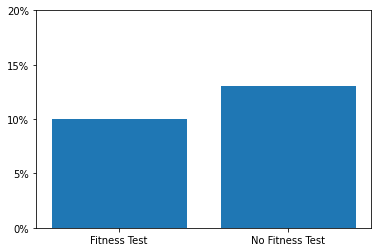

In [21]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
# plt.savefig('percent_visitors_apply.png')

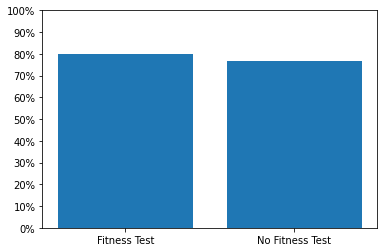

In [22]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_apply_purchase.png')

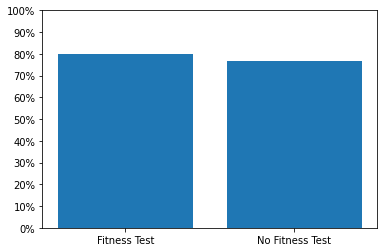

In [23]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_apply_purchase.png')

# Conclusion

We learned that there is a statistically significant difference in memberships between Group A and Group B. Therefore, we do not reject Janet's hypothesis that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A. However, it is important to note that when assessing the groups among those customers that filled out an application, those that completed a fitness test (Group A), were more likely to make a purchase than those customers that did not complete a fitness test (Group B). Therefore, instead of requiring visitors to take a fitness test before receiving an application, make taking the fitness test be optional.

# Challenge Assignment
Create a wordcloud visualization that can be used for an ad for Muscle Gym with the data in the interviews.txt file.

In [24]:
# Import modules
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for creating wordclouds
from collections import Counter  # for counting objects
from matplotlib.pyplot import figure # to create a figure in matplotlib

In [25]:
# Open and read the interviews.txt file
interviews = open(r"../input/musclehub-abtest/interviews.txt", encoding='utf8')
txtContent = interviews.read()
print ("The Content of text file is : ", txtContent)

The Content of text file is :  I always wanted to work out like all of the shredded people on the fitness accounts I see on Instagram, but I never really knew how to start. MuscleHub’s introductory fitness test was super helpful for me! After taking the fitness test, I had to sign up and keep coming back so that I could impress my trainer Rachel with how much I was improving!
- Cora, 23, Hoboken

When I walked into MuscleHub I wasn’t accosted by any personal trainers trying to sell me some mumbo jumbo, which I really appreciated. Down at LiftCity they had me doing burpees 30 seconds after I walked in the door and I was like “woah guys slow your roll, this is TOOOO much for Jesse!” I still ended up not signing up for a membership because the weight machines had all those sweat stains on them and you know, no thanks.
- Jesse, 35, Gowanes

I took the MuscleHub fitness test because my coworker Laura recommended it. Regretted it.
- Sonny "Dad Bod", 26, Brooklyn

I saw an ad for MuscleHub on

In [26]:
# Print the length of the new string
print('There are {} words in the total interviews.txt file.'.format(len(txtContent)))

There are 1293 words in the total interviews.txt file.


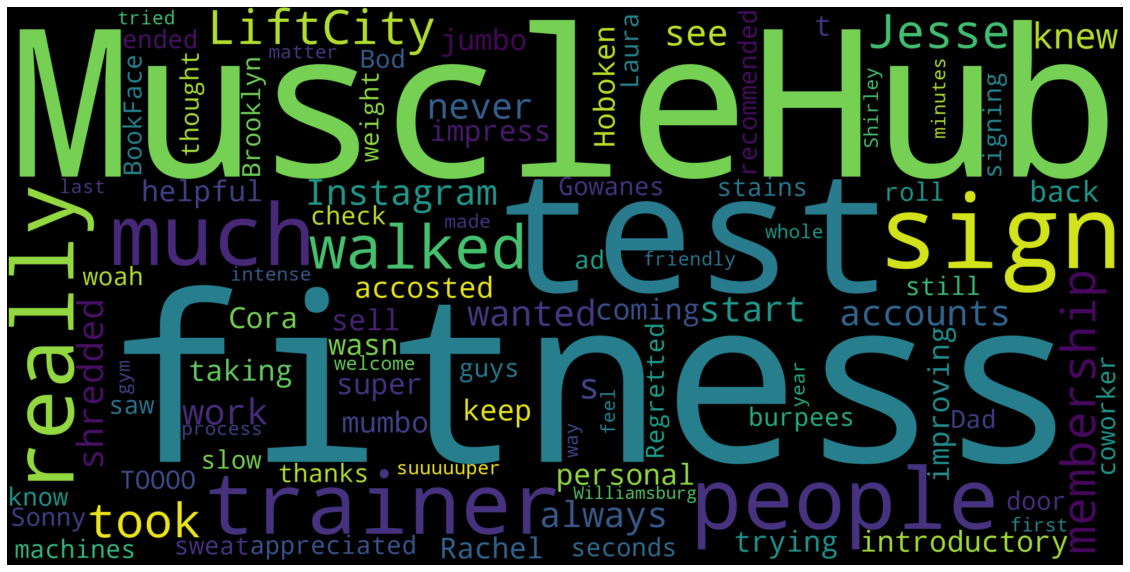

In [27]:
# Create a wordcloud object
wordcloud = WordCloud(width=2500, height=1250).generate(txtContent)

# Display the wordcloud with MatplotLib and save figure
figure(num=None, figsize=(20, 16), facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# plt.savefig('response_data/responses_wordcloud.png')